In [1]:
import re
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import math
import numpy

In [2]:
#wczytanie danych z pliku poland_shape ktory zawiera koordynacje punktow dla kazdego wojewodztwa i przekonwartowanie
#go do struktury danych jak w przykladowym pliku states
with open('poland_shape.txt', 'r') as f_in, open('states.txt', 'w') as f_out:
    data = literal_eval('{' + f_in.read() + '}')
    i = 0

    for k, v in data.items():
        print('<state name = "{city}">'.format(city=k), file=f_out)
        for point in v:
            if i%30 ==0:
                print('  <point lat="{point[0]}" lng="{point[1]}" />'.format(point=point), file=f_out)
                i = i+1
            else:
                i = i+1
        print('</state>', file=f_out)

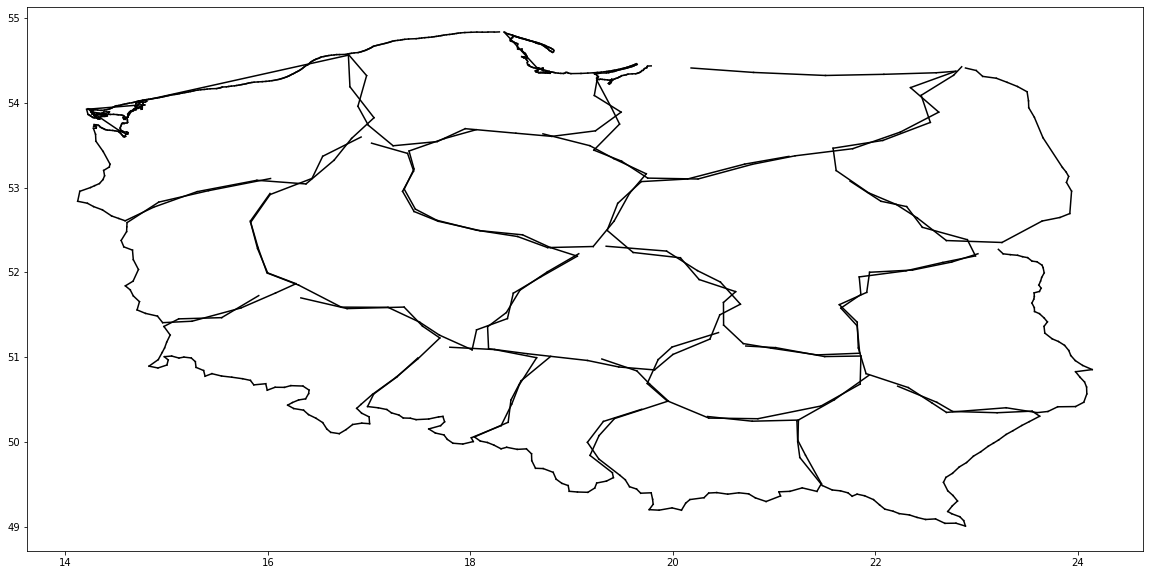

In [3]:
def plot_state_borders(plt,color='0'):

    segments = []
    points = []

    lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

    with open("states.txt", "r") as f:
        lines = [line for line in f]

    for line in lines:
        if line.startswith("</state>"):
            for p1, p2 in zip(points, points[1:]):
                segments.append((p1, p2))
            points = []
        s = re.search(lat_long_regex, line)
        if s:
            lat, lon = s.groups()
            points.append((float(lon), float(lat)))

    fig = plt.figure(figsize=(20,10))
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lat1, lat2],[lon1, lon2],color=color)


plot_state_borders(plt)

In [4]:
#przyklad z ulubionymi jezykami
def plot_languages():
    cities = [(20,51,"Python"),
             (19,51,"Java"),
              (18,51,"R"),
              (21,52,"Java"),
              (18.5,54.5,"Python"),
              (17.2,53.8,"Python"),
              (15,53,"R"),
              (15,52,"R"),
              (17,52,"Java"),
              (16.2,54,"Python"),
              (18,53,"Java"),
              (23,51,"Java"),
              (21,54,"Python"),
              (21,50,"R")
             ]
    
    #pozbycie sie problemu: too many values to unpack (expected 2)
    cities = [([longitude, latitude], language) for longitude, latitude, language in cities]
    plots = {"Java": ([],[]),"Python":([],[]),"R":([],[])}

    markers = {"Java": "o","Python": "s","R": "^"}
    colors = {"Java": "r","Python": "b","R": "g"}
    plot_state_borders(plt)

    for (longitude,latitude),language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)
    
    for language,(x,y) in plots.items():
        plt.scatter(x,y,color=colors[language],marker=markers[language],label=language,zorder=10)

        
    plt.legend(loc=0)
    plt.title('Ulubione jezyki programowanie')
    plt.show()
    return cities

In [5]:
#dodatkowe metody potrzebne do uzycia distance()
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)


def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [6]:
#pomocne metody 
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    #etykiety od najblizszej do najdalszej
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)

In [7]:
def draw_k_neighbour(cities, k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    plot_state_borders(plt)    
    #wykorzystanie numpy do gestszego zobrazowania punktow na mapie z krokiem 0.1
    for longitude in numpy.arange(14, 26, 0.1):
        for latitude in numpy.arange(48,55,0.1):
            predicted_language = knn_classify(k,cities,[longitude,latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plt.legend(loc=0)          
    plt.axis([14,25,48,55])
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    
    plt.show()

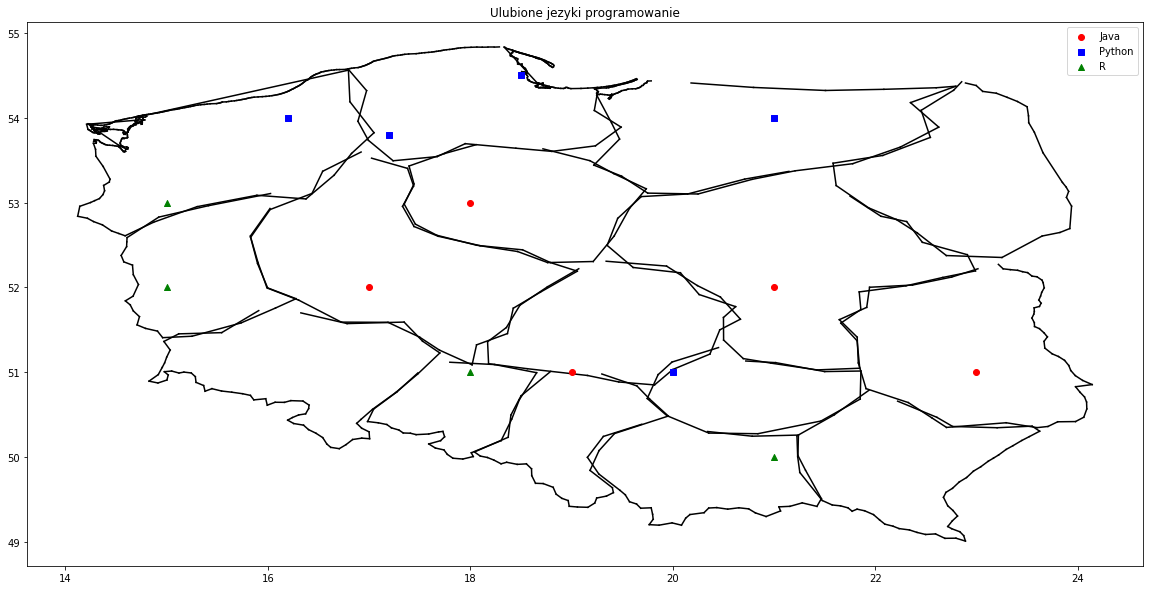

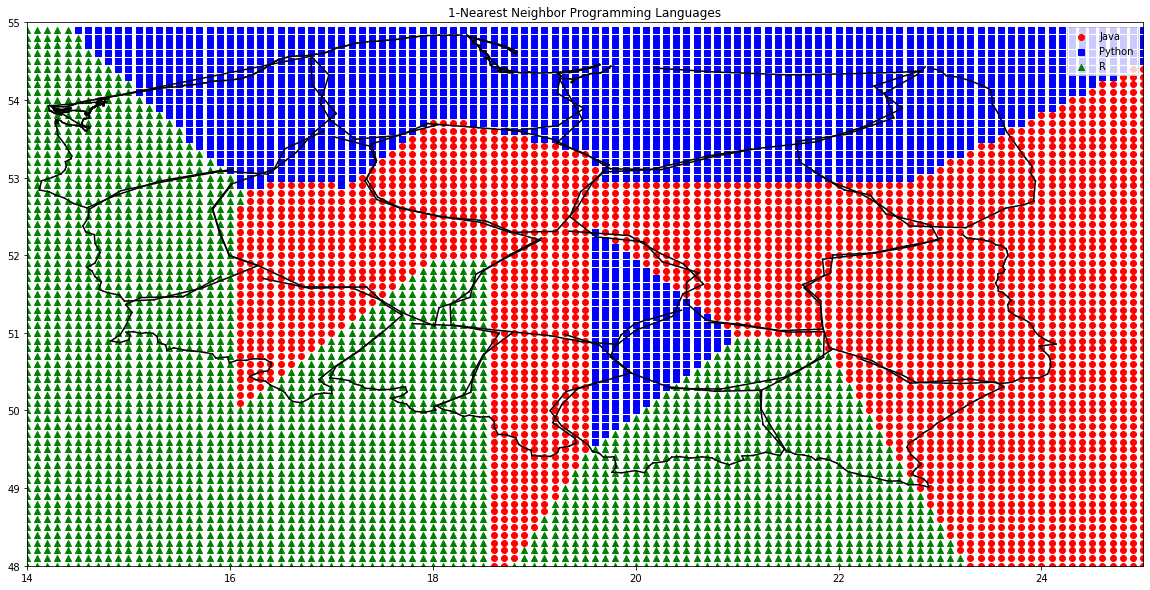

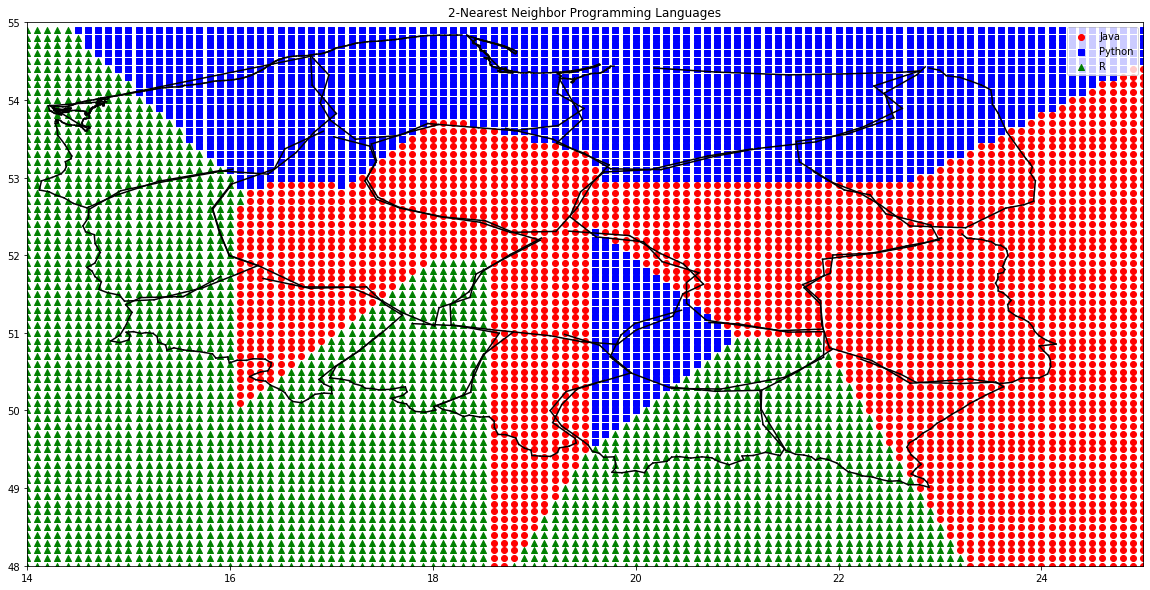

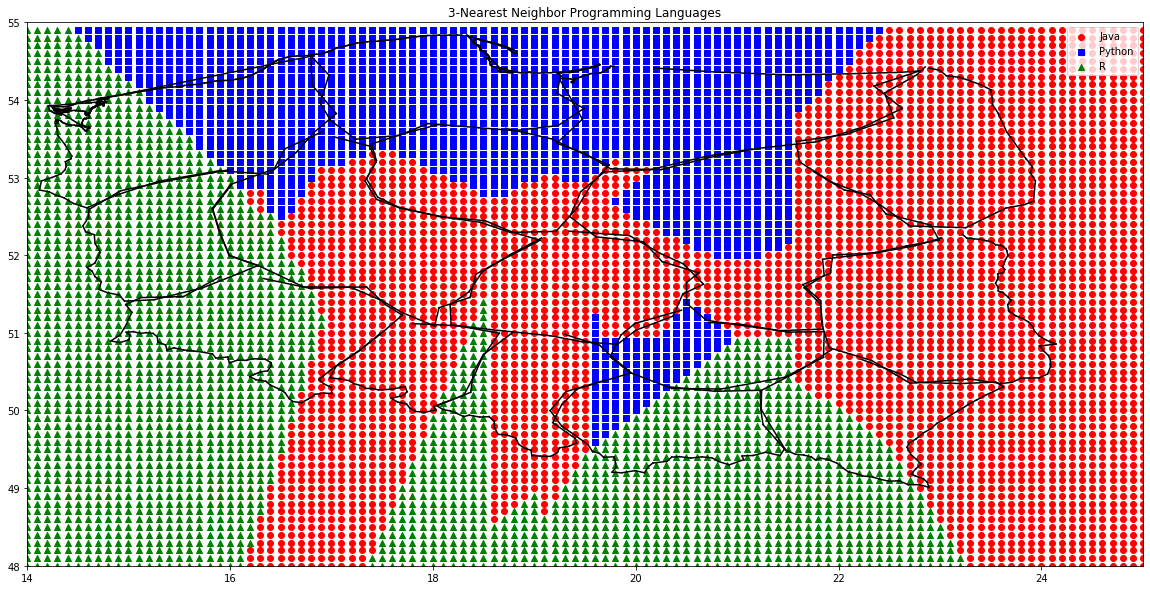

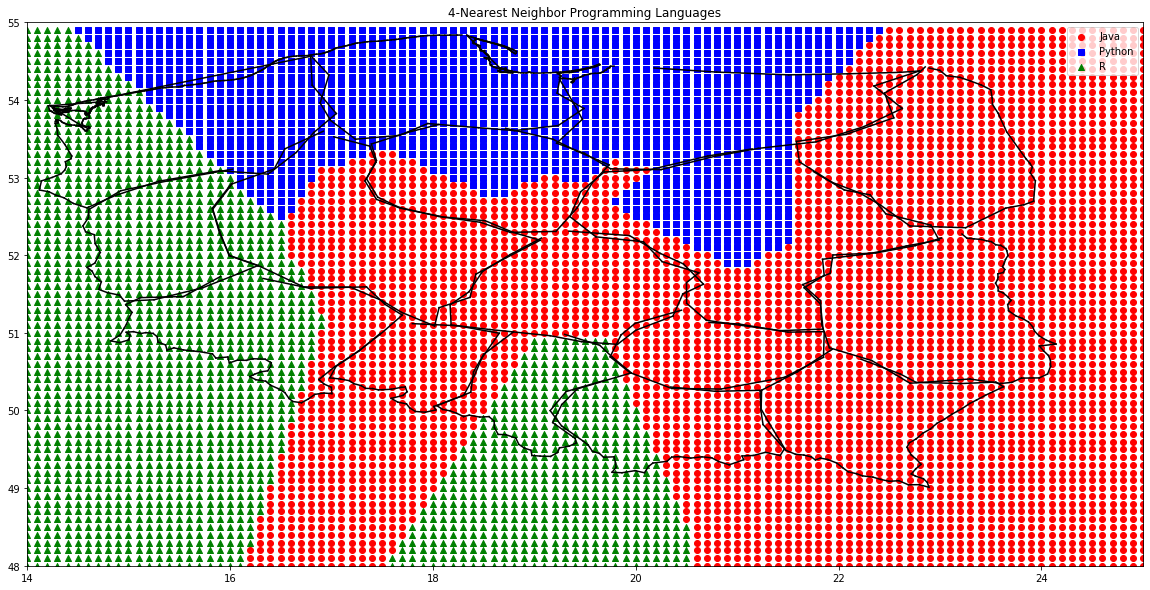

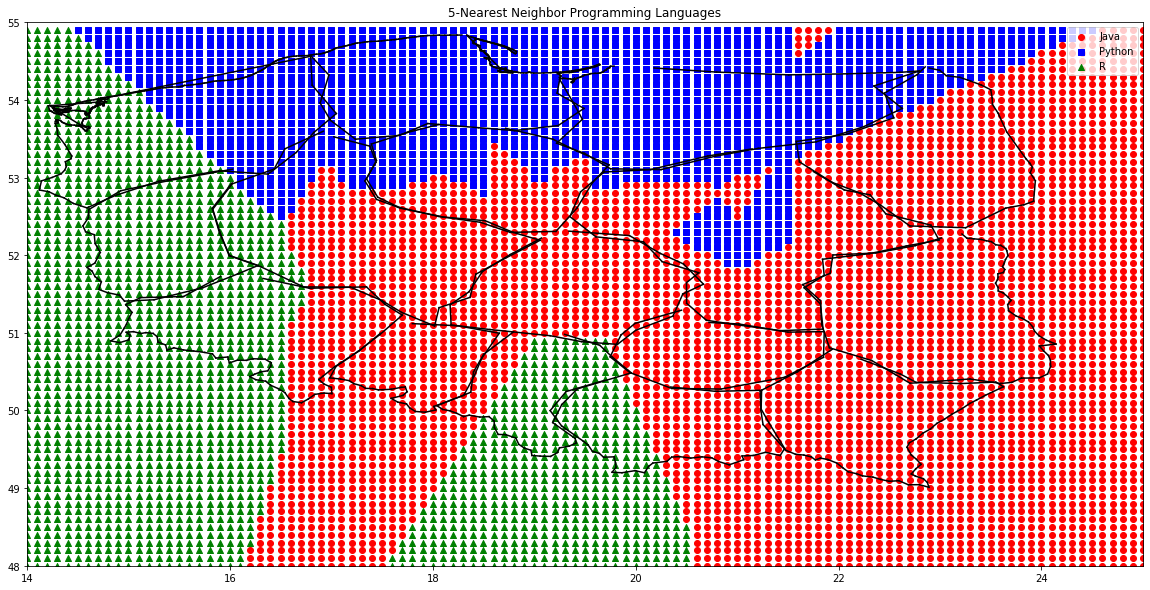

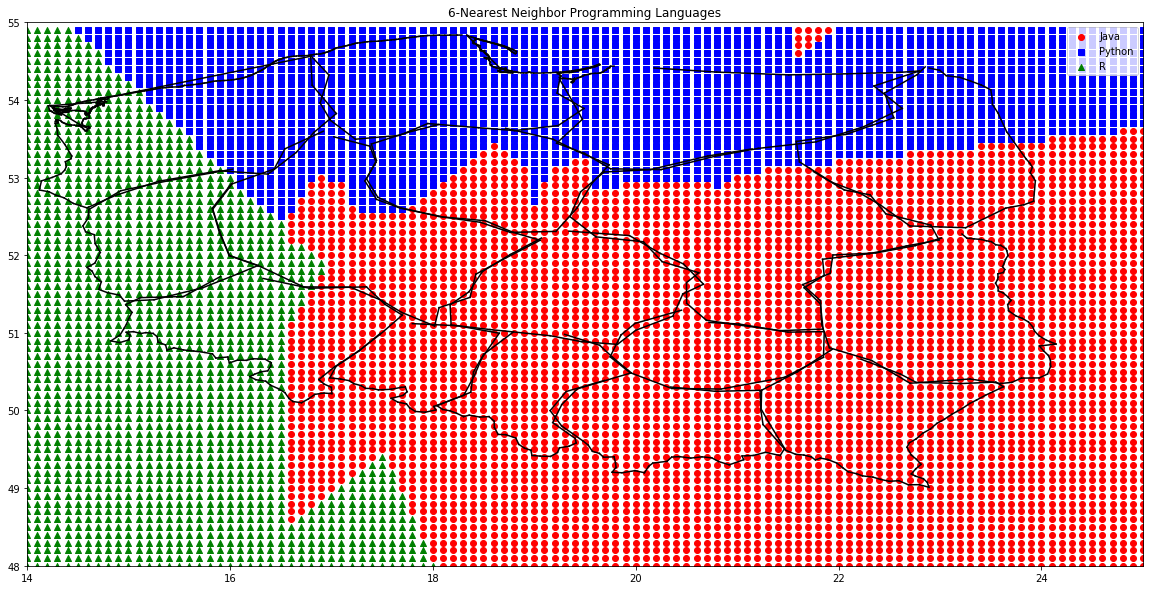

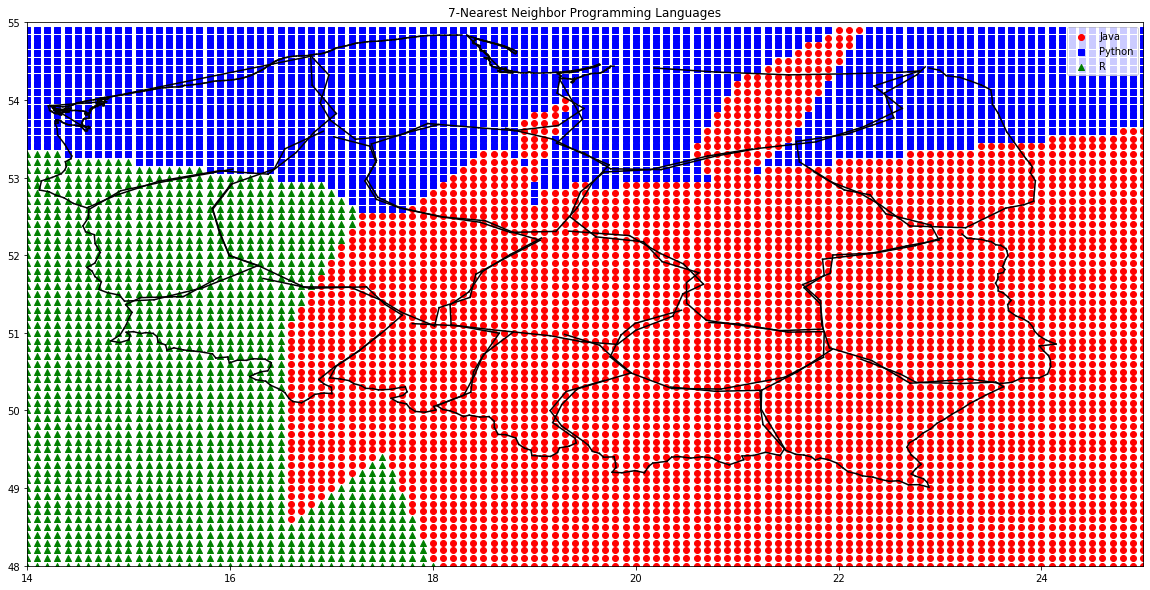

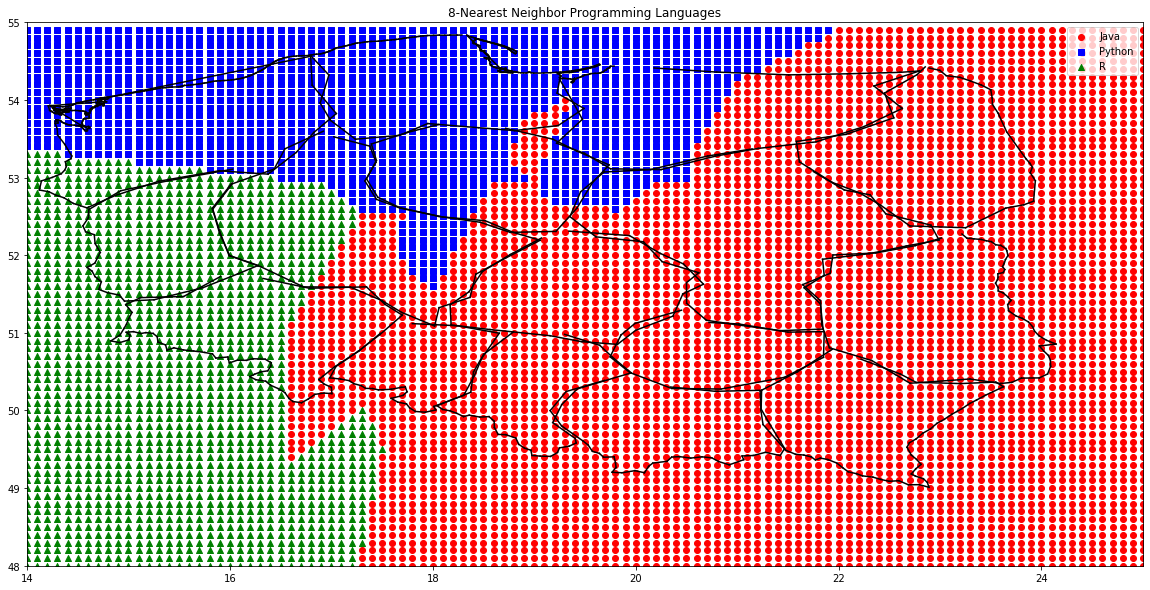

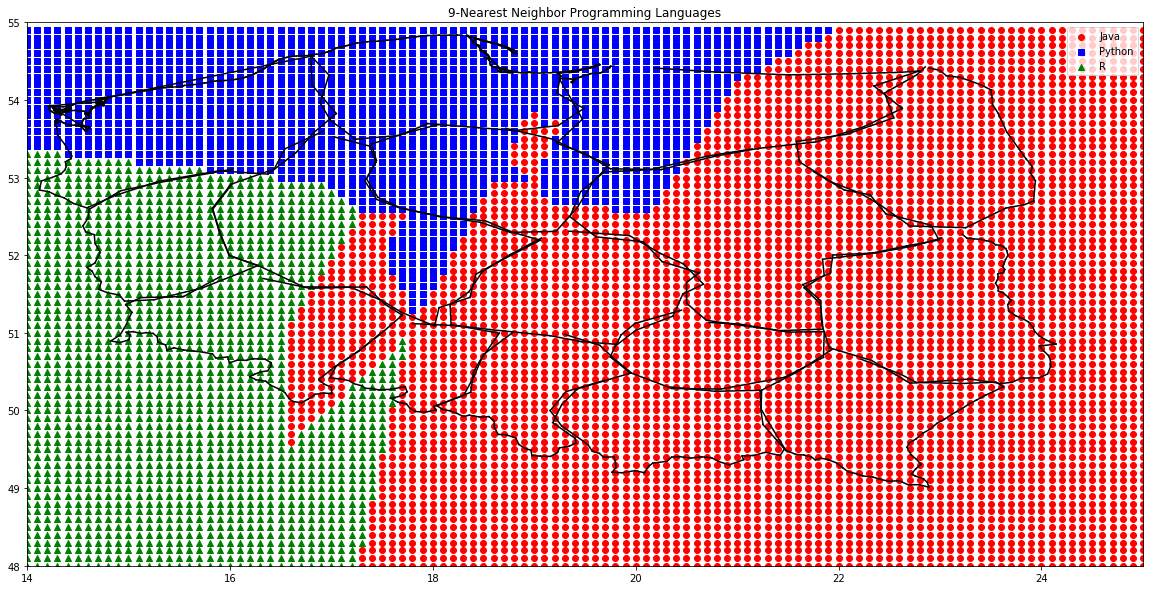

In [8]:
cities=plot_languages()
for k in range(1,10):
    draw_k_neighbour(cities, k)